In [1]:
script = False

import numpy as np
import pandas as pd
import os.path

from PIL import Image, ImageOps
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
def make_plot_all(objects, data):
    for i in range(len(objects)):
        #if(i==500): break
        if(i%4 == 0):
            plt.figure(figsize=(12,8))
            for j in range(4):
                if(i+j > len(objects)-1): break
                plt.subplot(1,4,j+1)
                print(data['COADD_OBJECT_ID'].iloc[i+j])
                tmp_title = '{:.3f}'.format(data['Prob'].iloc[i+j])
                plt.title(tmp_title)
                rgb = make_lupton_rgb(objects[i+j][2], objects[i+j][1], objects[i+j][0], Q=11., stretch=40.)
                plt.imshow(rgb, aspect='equal')
                plt.xticks([], [])
                plt.yticks([], []) 
            if(script):
                plt.savefig(title+'_'+str(i+j), bbox_inches='tight')
                plt.close()
            else: 
                plt.show()

In [3]:
def explore(name, prob_lim, endname):
    print(name)
    #with open('Y6_detections/' + name + '.out') as f:
    #    lines = f.readlines()
    #    print(lines[2].rstrip('\n'))
    #    print(lines[3])
    filename = name[:-5] + endname + '.fits'
    path = '/Users/jimenagonzalez/research/DSPL/Searching-double-lenses/vit_cnn_multiclass/Y6_detections/'
    file_path = path + filename
    hdu_list = fits.open(file_path)
    images = hdu_list[1].data
    data = pd.DataFrame(hdu_list[2].data)
    #print(data.columns)
    data = data.astype({'COADD_OBJECT_ID': int, 'Prob': float})
    hdu_list.close()
    
    data = data[data['Prob'] > prob_lim]
    images = images[data.index.tolist()]
    print(len(data))
    make_plot_all(images, data)
    

DES0001-4914.fits
112
1034682857
1034667242
1034704975
1034680779


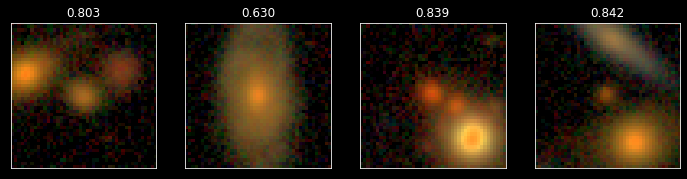

1034686078
1034681719
1034671744
1034702491


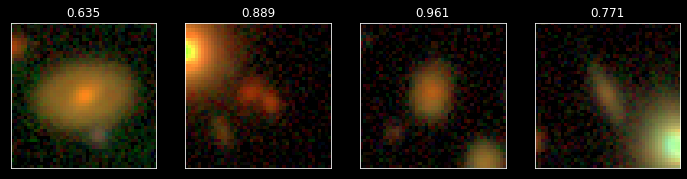

1034670843
1034681347
1034715971
1034726623


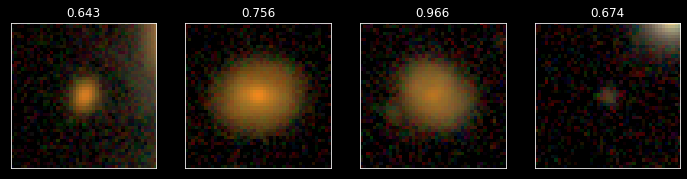

1034681727
1034695399
1034712269
1034706053


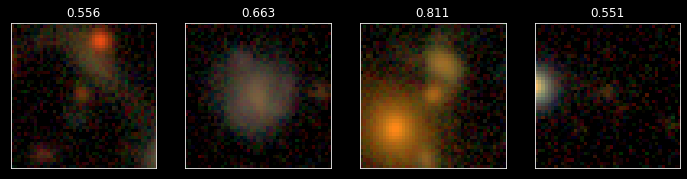

1034717182
1034669588
1034709214
1034688649


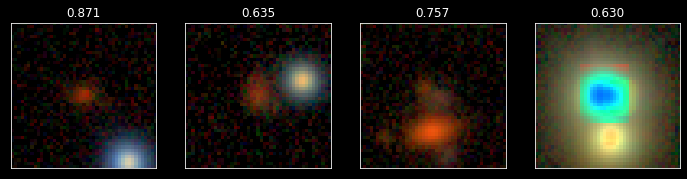

1034717459
1034691628
1034664356
1034682478


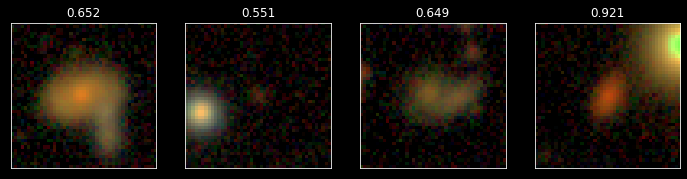

1034718844
1034702187
1034664292
1034665891


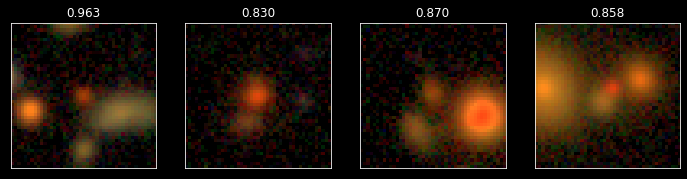

1034665207
1034715361
1034671121
1034673231


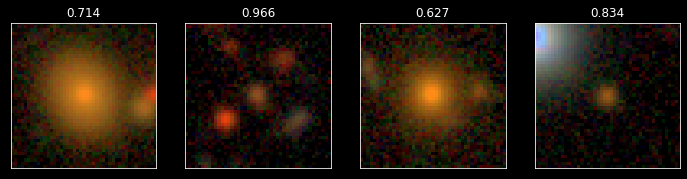

1034725116
1034679871
1034703965
1034671586


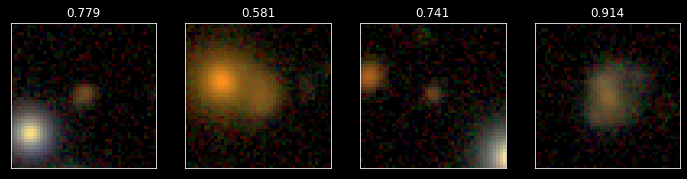

1034663624
1034716600
1034726899
1034684146


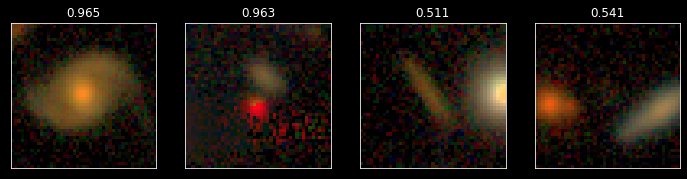

1034711395
1034691776
1034702766
1034675238


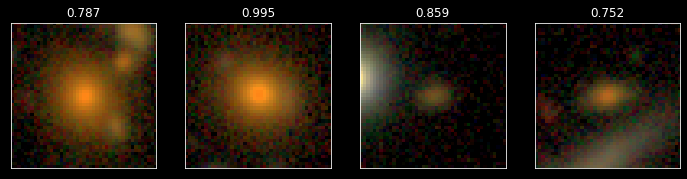

1034702387
1034702819
1034661909
1034707652


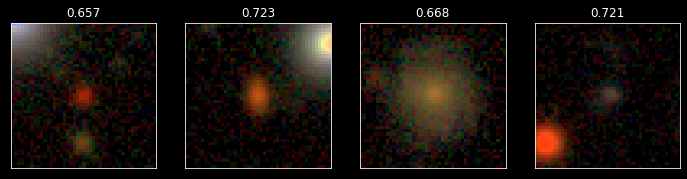

1034688474
1034689871
1034709920
1034712782


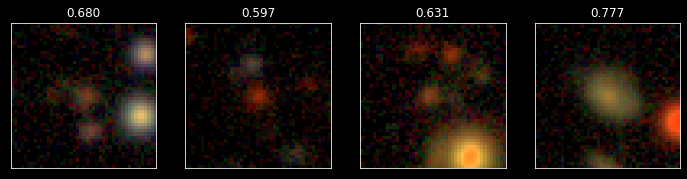

1034714907
1034661763
1034717536
1034675729


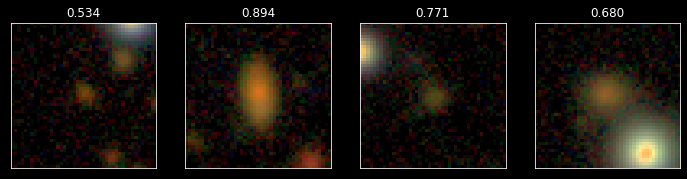

1034694050
1034705859
1034688559
1034706400


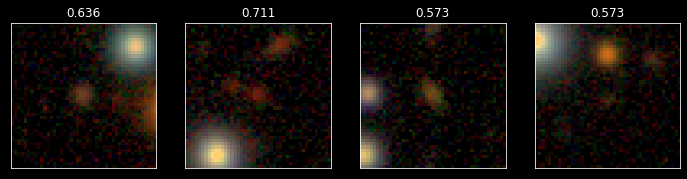

1034725106
1034689303
1034683576
1034714433


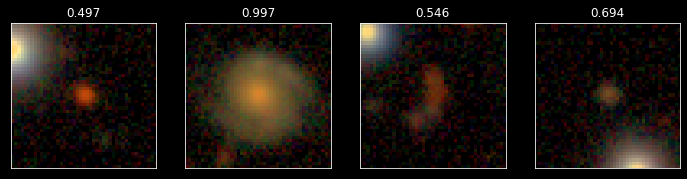

1034668941
1034697453
1034692813
1034725690


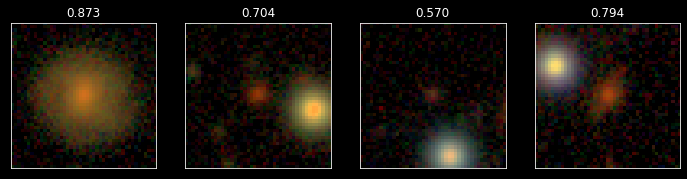

1034681856
1034714203
1034703081
1034689164


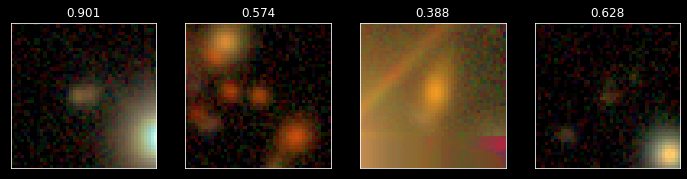

1034716355
1034670537
1034683709
1034683157


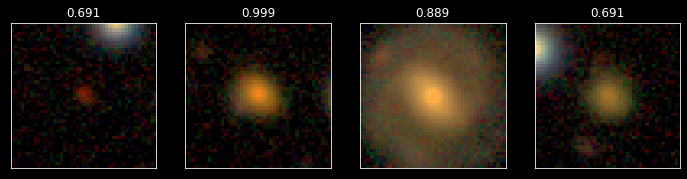

1034685523
1034662136
1034678686
1034712738


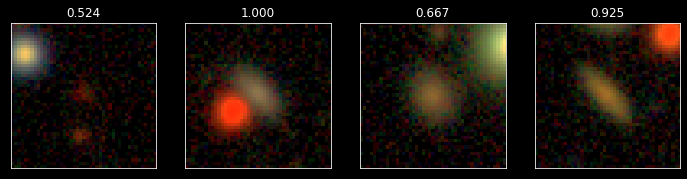

1034687765
1034692072
1034663526
1034724776


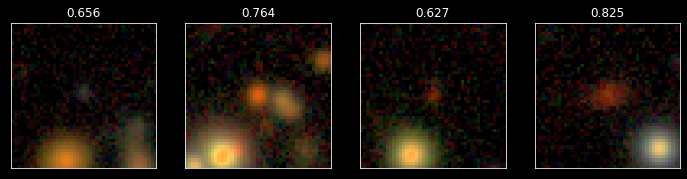

1034707709
1034666162
1034692717
1034684484


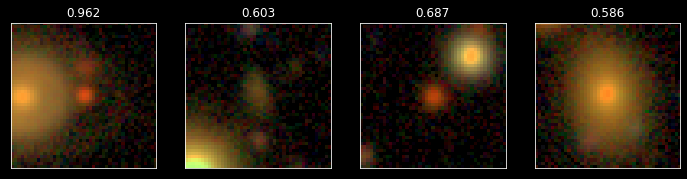

1034676495
1034679544
1034666084
1034695436


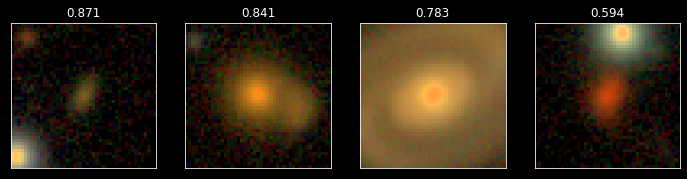

1034667757
1034707023
1034712314
1034699907


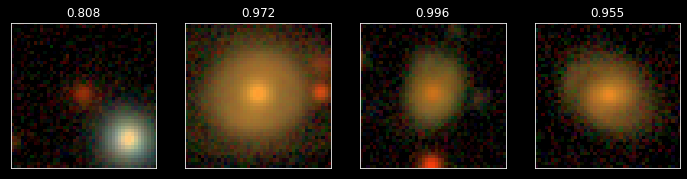

1034722866
1034697022
1034683111
1034687386


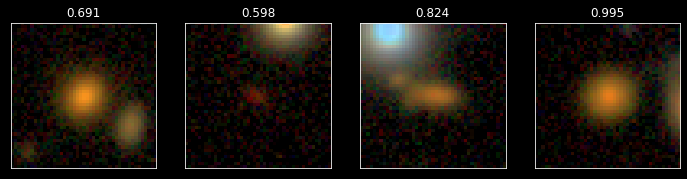

1034709107
1034687036
1034722515
1034728068


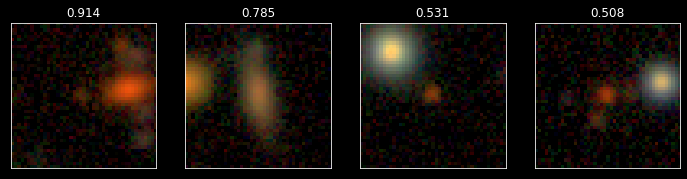

1034718216
1034696336
1034716167
1034688915


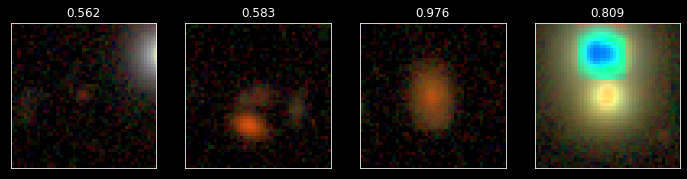

1034670952
1034682622
1034722427
1034710364


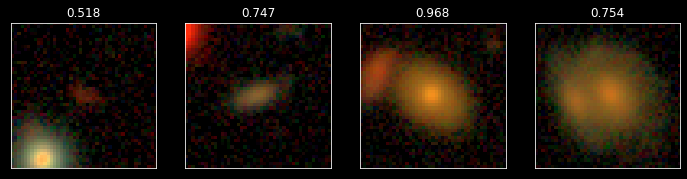

DES0001-4957.fits
64
1034769495
1034795711
1034792739
1034242785


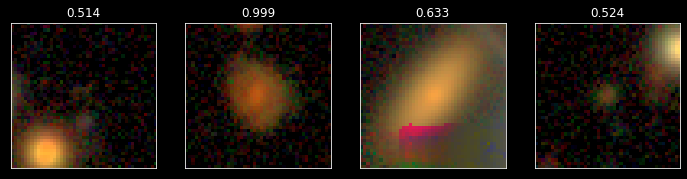

1034787126
1034795975
1034809557
1034804136


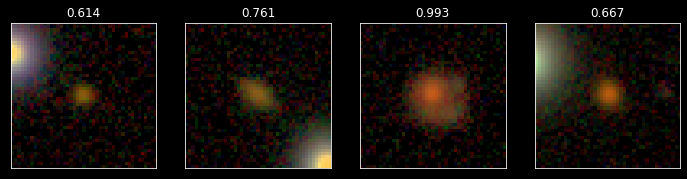

1034778224
1034767149
1034802932
1034766447


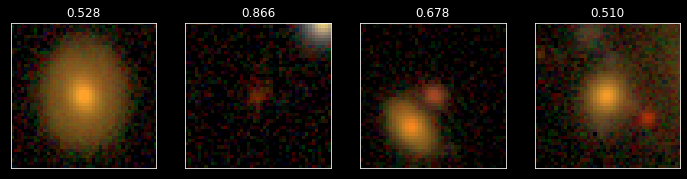

1034792779
1034232197
1034799682
1034797922


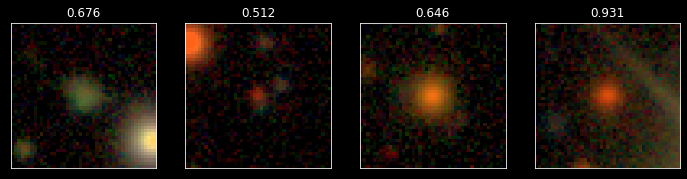

1034769352
1034782958
1034766990
1034770796


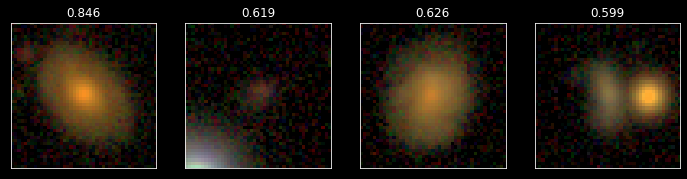

1034784386
1034763954
1034764008
1034771113


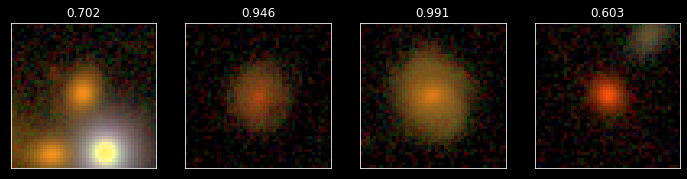

1034239972
1034766153
1034802585
1034806651


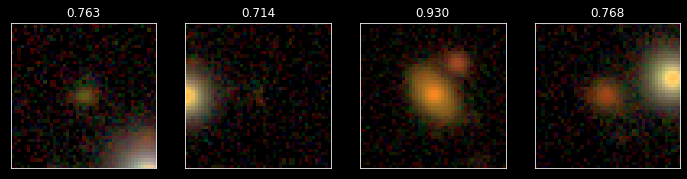

1034774709
1034796990
1034790669
1034797105


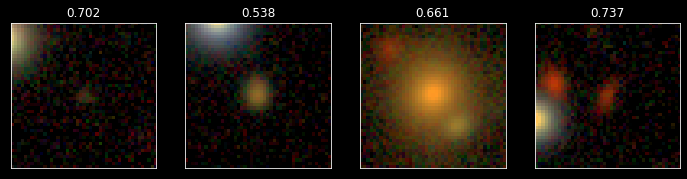

1034775300
1034769900
1034808548
1034771283


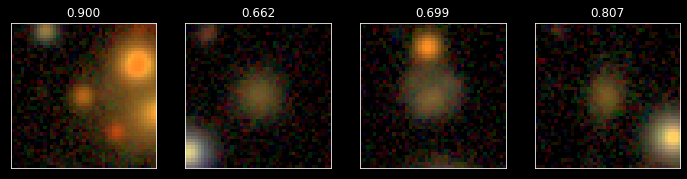

1034802242
1034232521
1034232106
1034768978


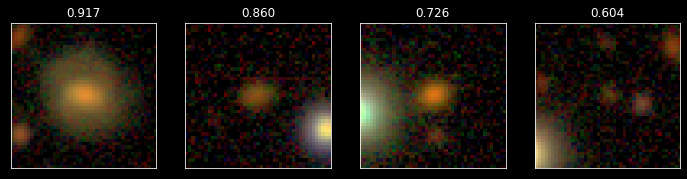

1034763804
1034777047
1034809847
1034798209


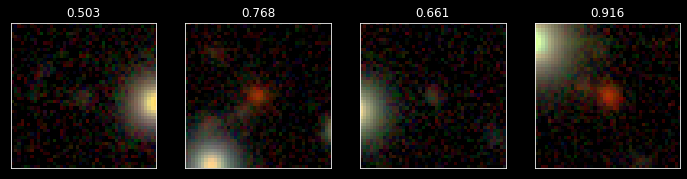

1034237335
1034778824
1034784387
1034771830


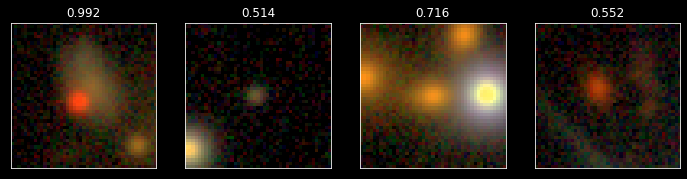

1034232299
1034765794
1034805198
1034778535


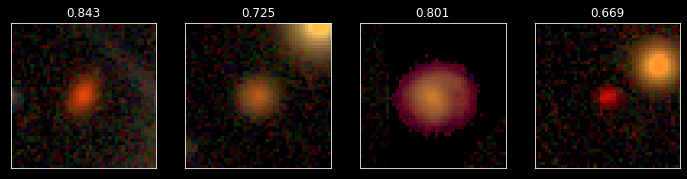

1034803891
1034240461
1034802274
1034238797


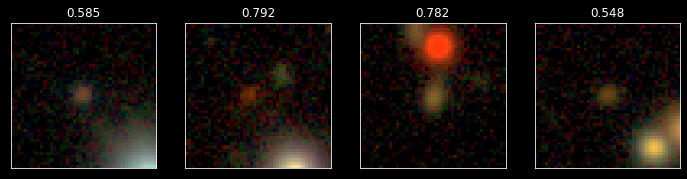

1034769950
1034783031
1034242748
1034770410


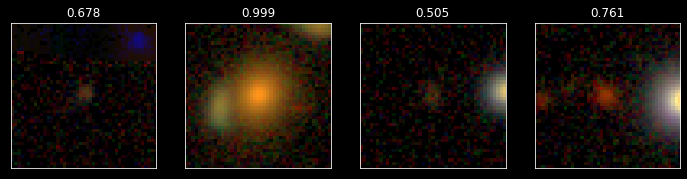

1034801622
1034237031
1034784808
1034237548


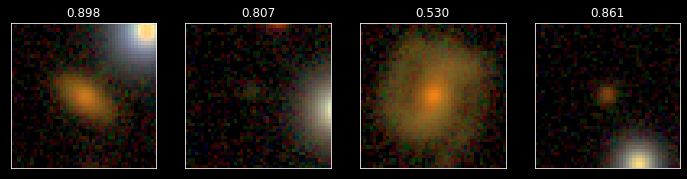

In [9]:
#Labeled as rest positives
endname = ['', '_des', '_sdss', '_rest']
data = pd.read_csv('tiles_pd.csv')
for index, row in data.iterrows():
    #if(index == 5): break
    name = row['tile']
    prob_lim = 0.
    if(not os.path.isfile('Y6_detections/' + name)):
        continue
    explore(name, prob_lim, endname[0])
    

DES0001-4914.fits
33
1034661169
1034665858
1034664477
1034728006


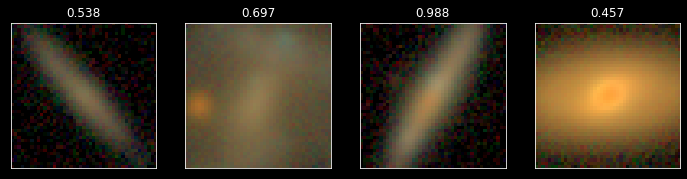

1034686945
1034721883
1034706249
1034722365


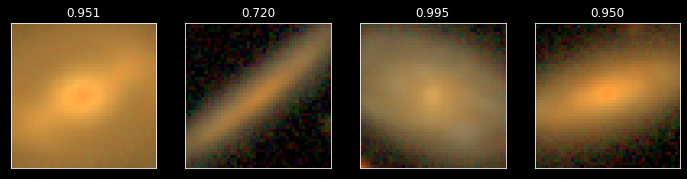

1034670667
1034680240
1034705337
1034675537


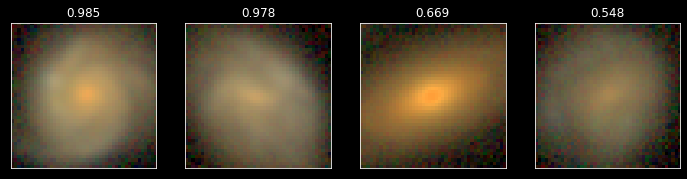

1034695245
1034723269
1034711086
1034723702


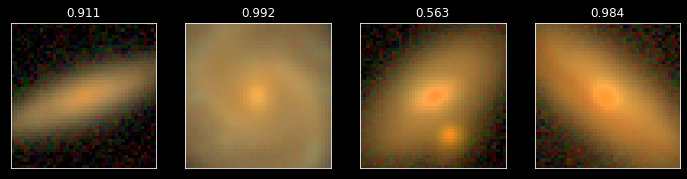

1034684301
1034695778
1034727853
1034685272


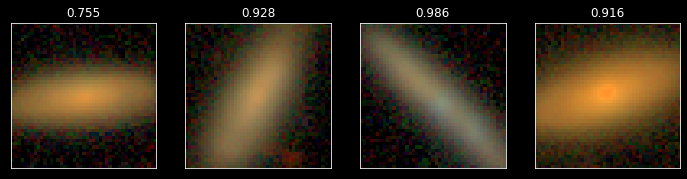

1034721226
1034722303
1034727792
1034677831


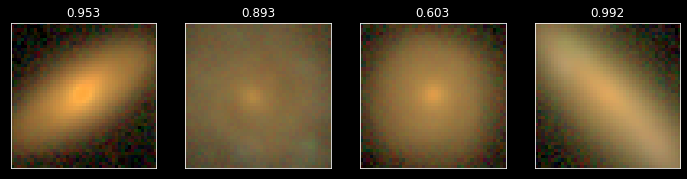

1034726399
1034696745
1034665846
1034720828


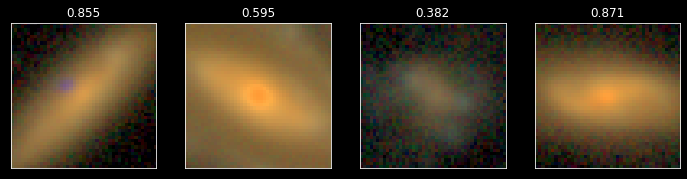

1034669201
1034675690
1034718319
1034719145


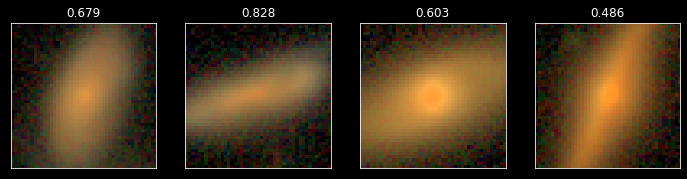

1034676704


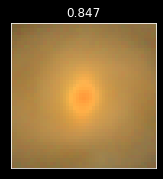

DES0001-4957.fits
21
1034779763
1034796101
1034241807
1034793018


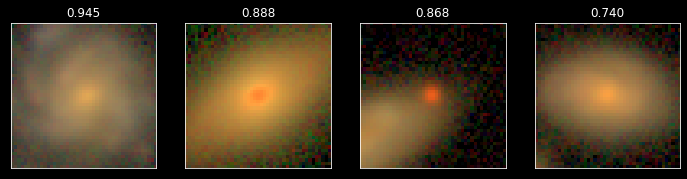

1034769593
1034240700
1034232571
1034241127


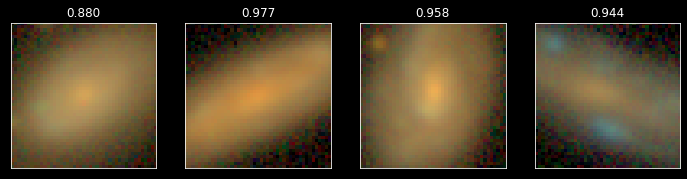

1034230903
1034779929
1034775916
1034768717


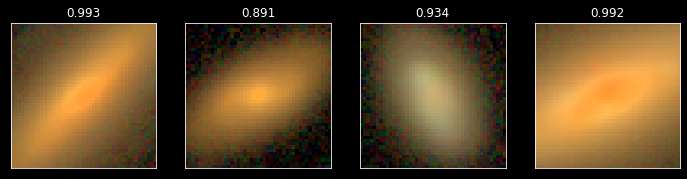

1034774312
1034791684
1034781776
1034802513


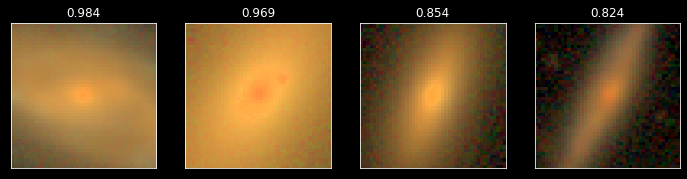

1034777130
1034789658
1034796242
1034239239


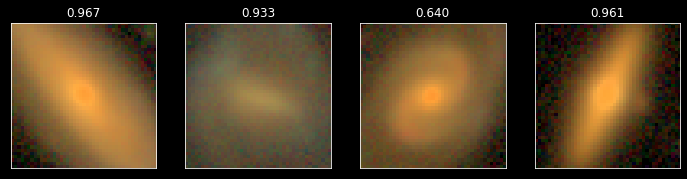

1034802021


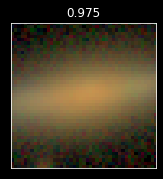

In [5]:
#Labeled as rest des spirals
endname = ['', '_des', '_sdss', '_rest']
data = pd.read_csv('tiles_pd.csv')
for index, row in data.iterrows():
    if(index == 5): break
    name = row['tile']
    prob_lim = 0.
    if(not os.path.isfile('Y6_detections/' + name[:-5] + endname[1] + '.fits')):
        continue
    explore(name, prob_lim, endname[1])
    

DES0001-4914.fits
43
1034677461
1034709130
1034699690
1034719366


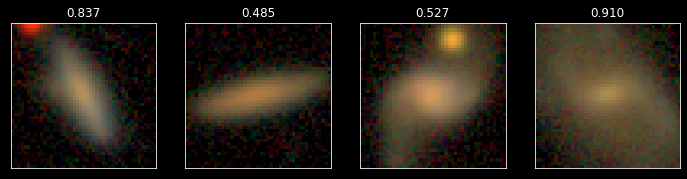

1034661723
1034663351
1034708488
1034712721


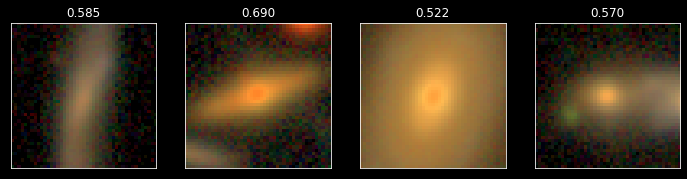

1034703175
1034722519
1034713204
1034680227


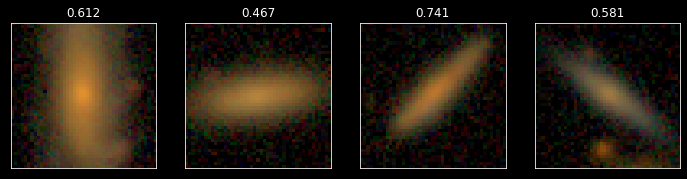

1034715880
1034712557
1034694851
1034668025


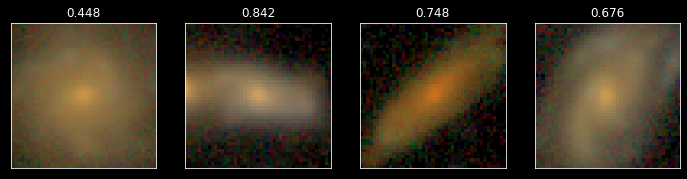

1034718955
1034723980
1034705022
1034699411


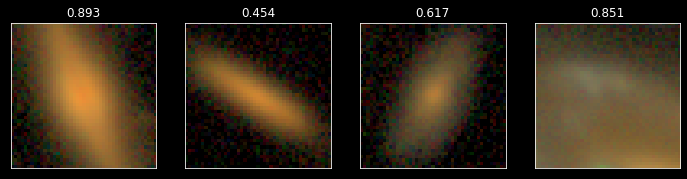

1034688653
1034674303
1034721268
1034697956


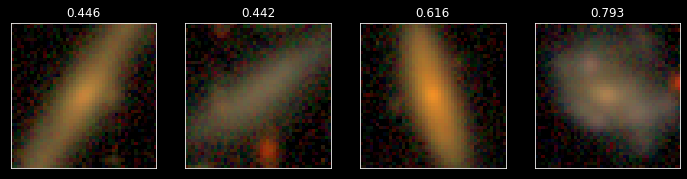

1034722447
1034705797
1034711632
1034663447


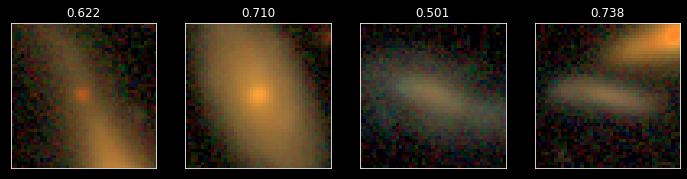

1034697539
1034698890
1034675037
1034666604


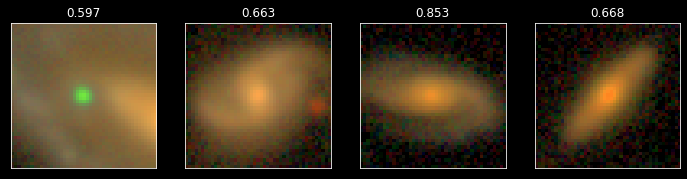

1034724808
1034664161
1034704174
1034700664


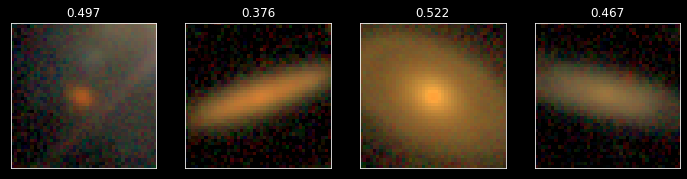

1034691525
1034711870
1034665640
1034667241


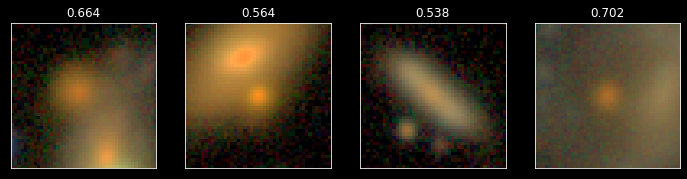

1034666195
1034687490
1034726470


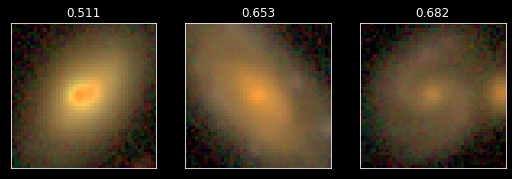

DES0001-4957.fits
30
1034770752
1034793767
1034236954
1034770541


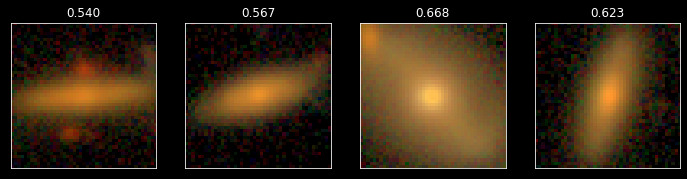

1034788736
1034239649
1034767381
1034782940


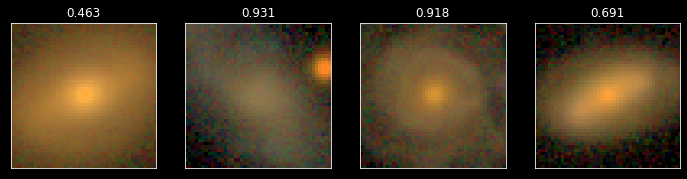

1034230114
1034778301
1034788061
1034772628


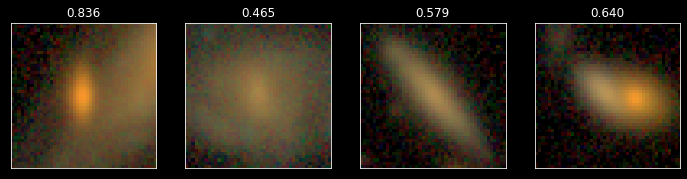

1034764428
1034766037
1034766181
1034789411


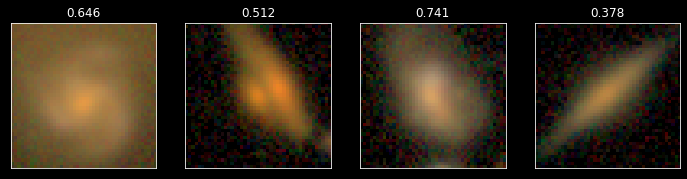

1034237519
1034779144
1034804782
1034796733


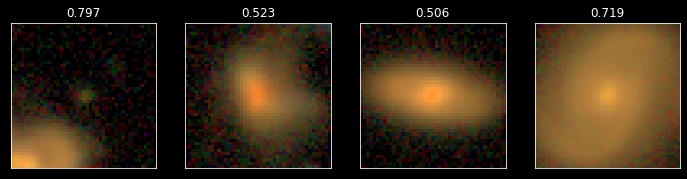

1034770432
1034768378
1034804028
1034235424


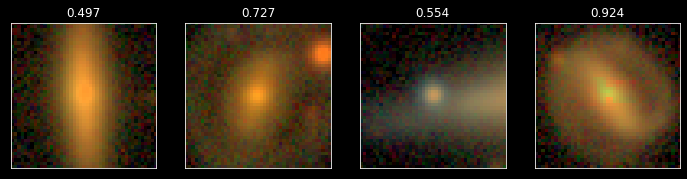

1034230317
1034236872
1034766022
1034786369


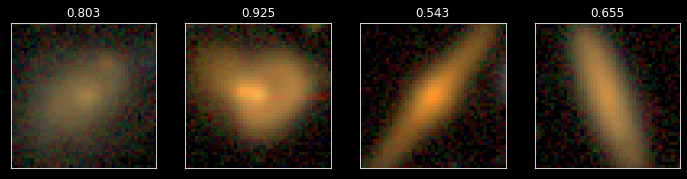

1034772493
1034233520


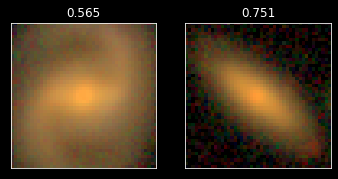

In [6]:
#Labeled as rest sdss spirals and rings
endname = ['', '_des', '_sdss', '_rest']
data = pd.read_csv('tiles_pd.csv')
for index, row in data.iterrows():
    if(index == 5): break
    name = row['tile']
    prob_lim = 0.
    if(not os.path.isfile('Y6_detections/' + name[:-5] + endname[2] + '.fits')):
        continue
    explore(name, prob_lim, endname[2])
    